# Overall
```
- 프로젝트명 : 상품가입고객 예측 및 타겟 마케팅
- 프로젝트유형 : 데이터 EDA 및 Classification(분류) 예측

- 시나리오 :
    - 최근 주식, 코인 투자가 열풍이 불면서 A은행의 정기예금 가입자가 감소하고 있다.
    - 정기예금 가입률이 높았을 때는 Mass 마케팅 형식으로 홍보를 해도 투자 대비 효율이 좋았지만
    - 현재는 가입률이 떨어지고 있기 때문에 마케팅 비용 투자 대비 효율이 감소하고 있는 상황이다.
    - 마케팅 비용을 줄이기 위해 정기예금 가입 가능성이 높은 고객군을 추출하고 타겟 마케팅을 수행하고자 한다.
- 문제정의 : 정기예금 가입자 감소, 마케팅 비용 투자 대비 효율 저조
- 기대효과 : 정기예금 가입률 증가, 마케팅 비용 투자 대비 효율 증대
- 해결방안 :
    - 정기예금 가입 가능성이 높은 타겟 고객군 추출 및 대상 마케팅
- 성과측정 : 대조군 대비 타겟 고객군 정기예금 가입률
- 운영방향 :
    - 매 월 Data mart 생성 후 Model을 활용하여 타겟 고객군 추출
    - 마케팅 후 대조군과 비교를 통해 마케팅 효과 모니터링

- 분석결과
    - (해당 항목은 향후 모델링 및 예측 성과 분석 후 작성 예정)

- 제안
    - (해당 항목은 타겟 마케팅 효과 및 변수 중요도 해석 이후 작성 예정)

- Meta data
    - age : 나이  
    - job : 직업  
    - marital : 결혼 상태  
    - education : 교육 수준  
    - default : 신용카드 보유 여부  
    - housing : 주택 대출 여부  
    - loan : 개인 대출 여부  
    - contact : 연락 방식  
    - month : 마지막 연락이 이루어진 월  
    - day_of_week : 마지막 연락이 이루어진 요일  
    - duration : 통화 시간 (※ 예측 시 제외)  
    - campaign : 캠페인 기간 내 고객 연락 횟수  
    - pdays : 이전 캠페인 후 지난 일수  
    - previous : 과거 캠페인에서의 연락 횟수  
    - poutcome : 이전 마케팅 결과  
    - emp.var.rate : 고용 변동률  
    - cons.price.idx : 소비자 물가 지수  
    - cons.conf.idx : 소비자 신뢰 지수  
    - euribor3m : 유리보 3개월 비율  
    - nr.employed : 직원 수  
    - y : 정기예금 가입 여부 (타겟 변수)  

```

<!-- https://colab.research.google.com/drive/17B9et0hy_7LgYfvjQeNNvfSbYRiIx5rT -->
<!-- https://colab.research.google.com/drive/1RHj1B7xHvwqcOxg8PUSw3VfpXVUkH6yI -->



In [209]:
# Warnings 제거
import warnings
warnings.filterwarnings('ignore')

# # Google drive mount or 폴더 클릭 후 구글드라이브 연결
# from google.colab import drive
# drive.mount('/content/drive')

# # 경로 설정 (※강의자료가 위치에 있는 경로 확인)
# import os
# os.chdir('/content/drive/MyDrive/zerobase/05.DataSchool/01.Sample_PJT/S_PJT03')
# os.getcwd()

In [210]:
# Data read
import pandas as pd
df = pd.read_csv('S_PJT03_DATA.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## **🔈Process01**  
---

### · Data 전처리  

In [211]:
# Data 형태 확인
# 41,188  row, 21 col로 구성됨
df.shape

(41188, 21)

In [212]:
# Data type 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [213]:
# Null 값 확인
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [214]:
# Outlier 확인, 음수값 확인
pd.DataFrame(df.describe())

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [215]:
pd.DataFrame(df.describe(exclude = 'int'))

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,12,4,8,3,3,3,2,10,5,3,NaN,NaN,NaN,NaN,NaN,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


In [216]:
# 평균 정기예금 가입률 11%

pd.concat([df['y'].value_counts(), df['y'].value_counts(normalize = True) * 100], axis = 1)

,count,proportion
y,,
no,36548,88.734583
yes,4640,11.265417


### · Categorical(범주형) 변수 파악
---
* Categorical(범주형) 변수의 현황을 파악한다.

In [217]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [218]:
# numerical, categorical data 나누기
categorical_list = df.describe(include = 'object').columns.tolist()
numerical_list = df.describe(exclude = 'object').columns.tolist()

In [219]:
df[categorical_list].nunique()

,0
job,12
marital,4
education,8
default,3
housing,3
loan,3
contact,2
month,10
day_of_week,5
poutcome,3


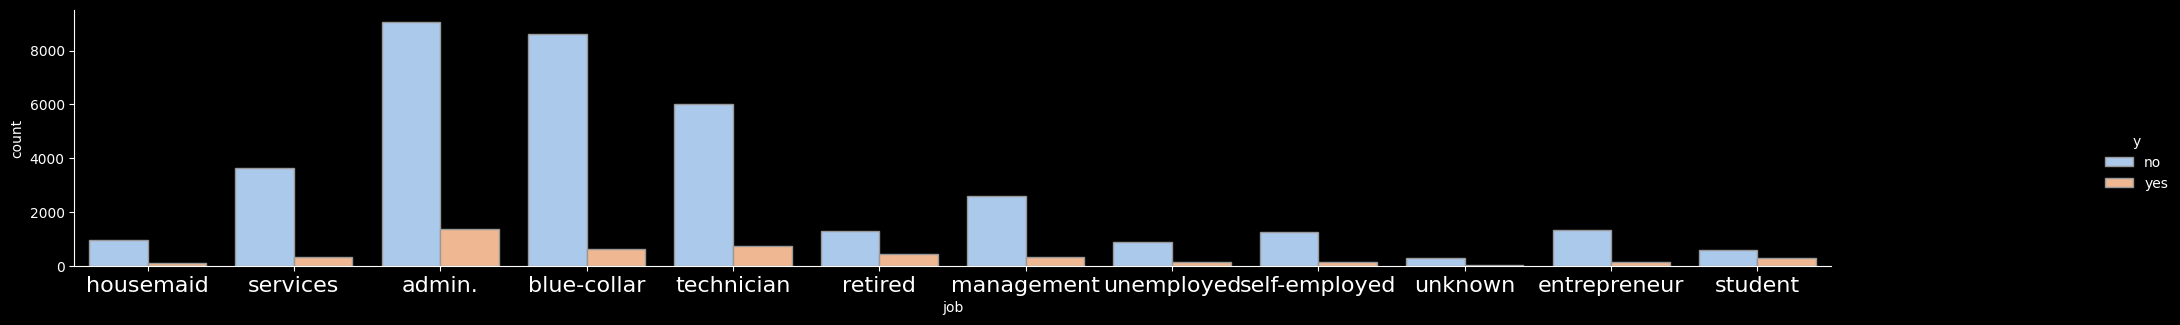

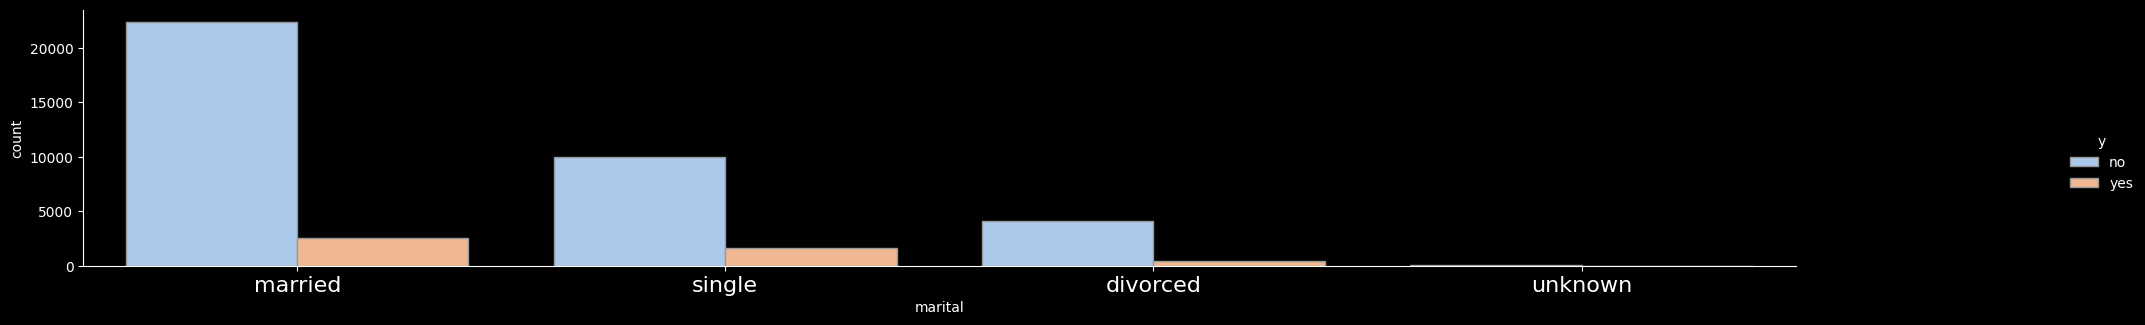

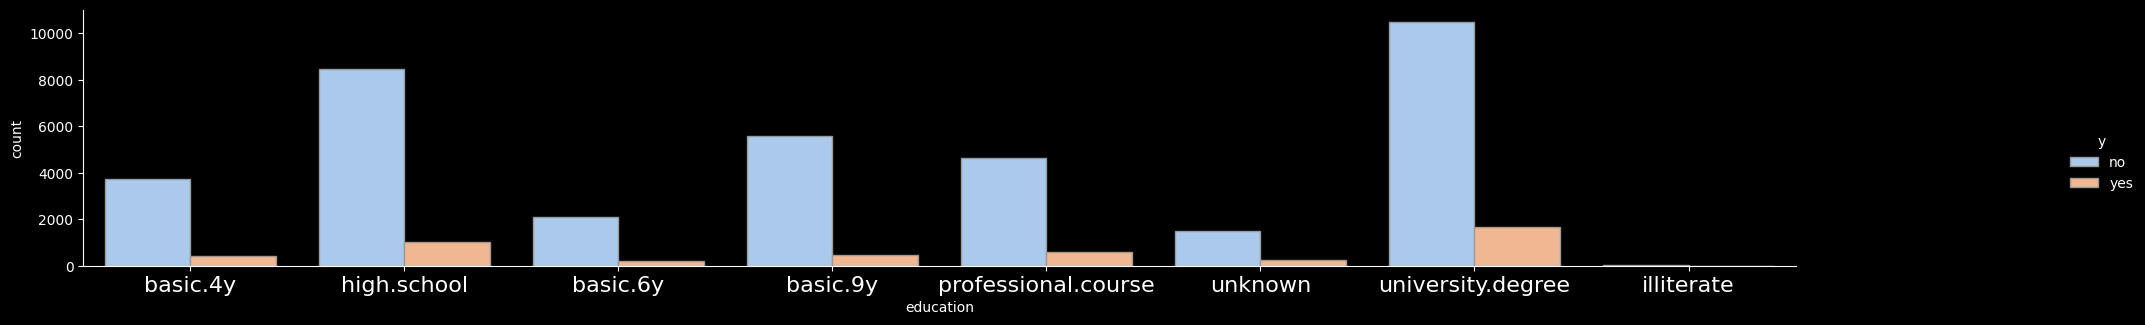

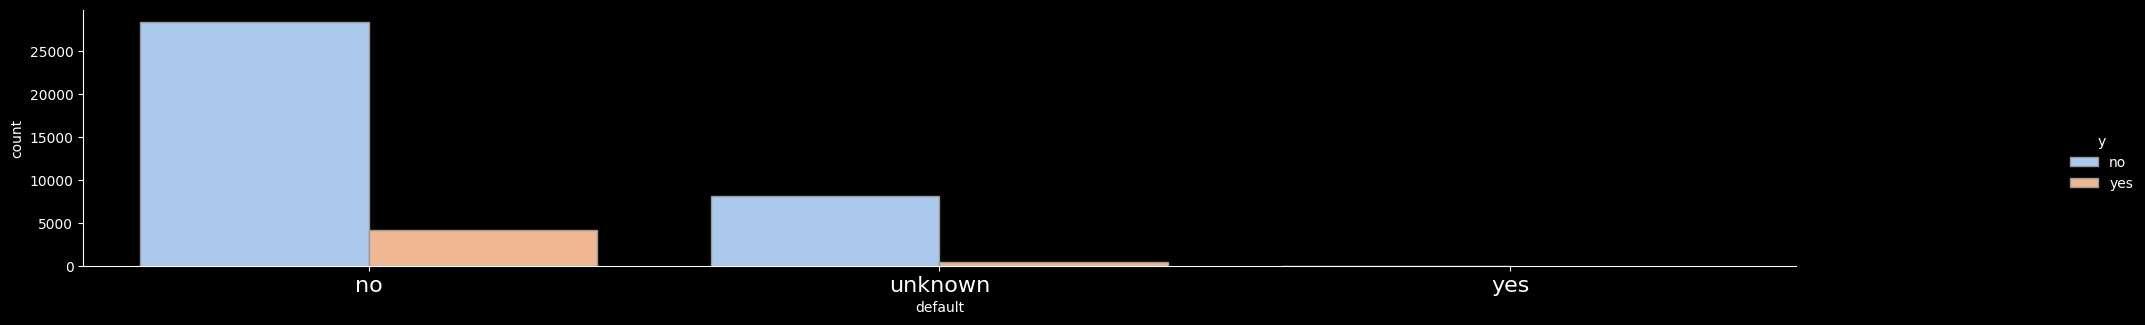

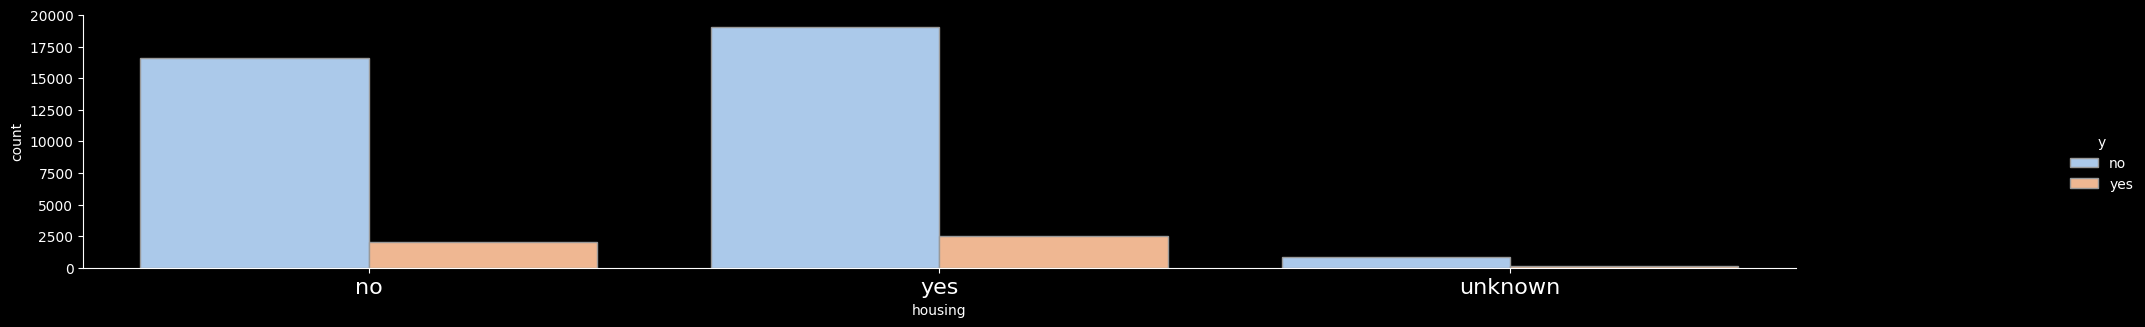

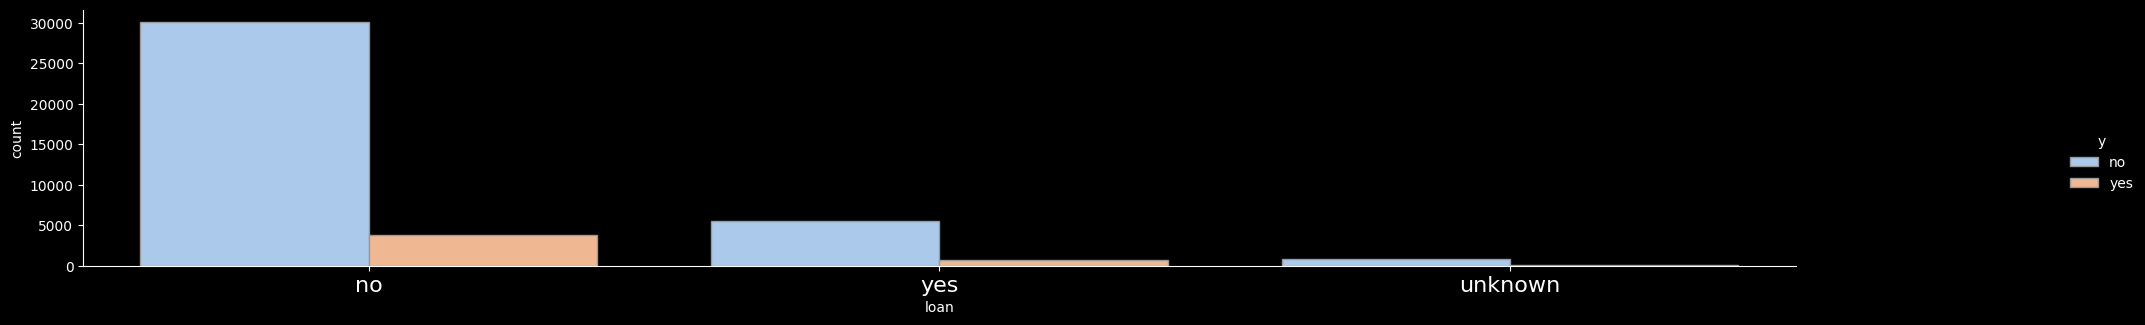

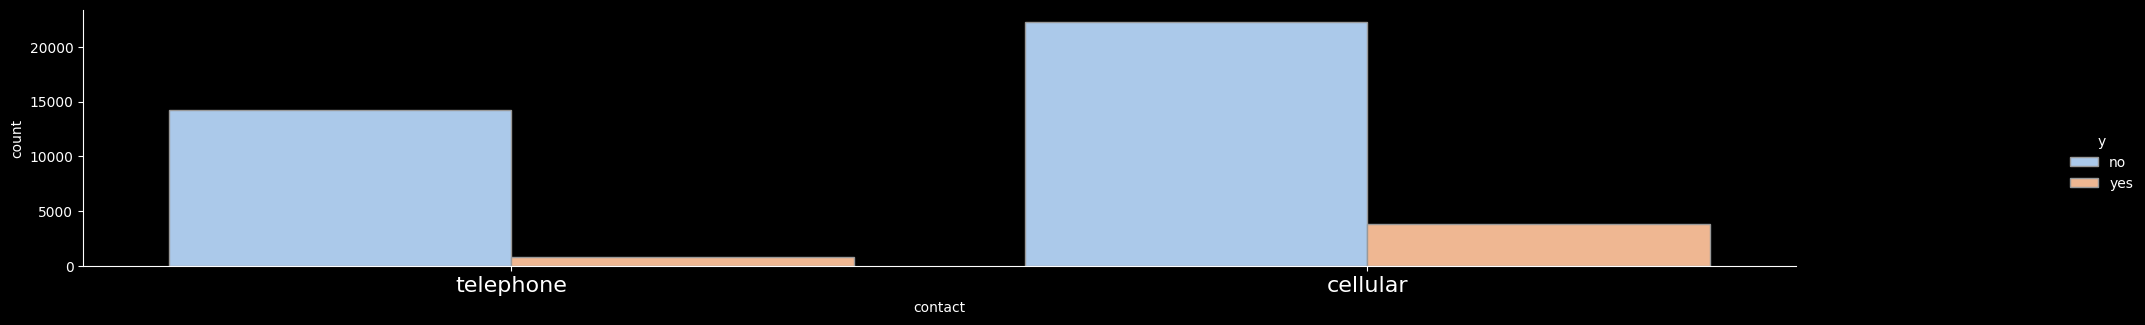

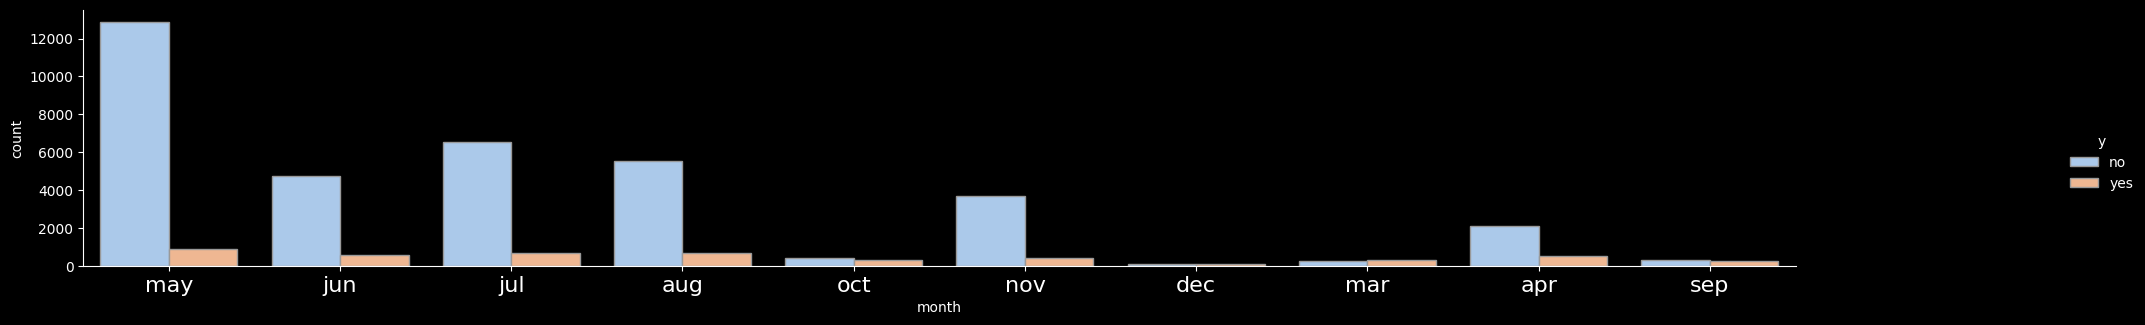

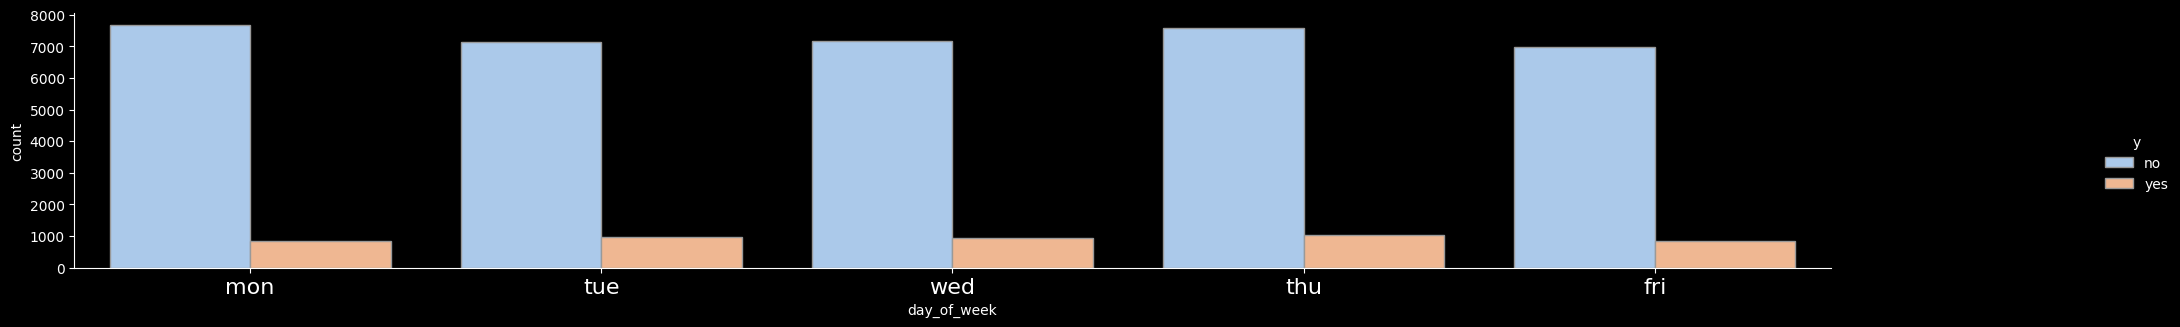

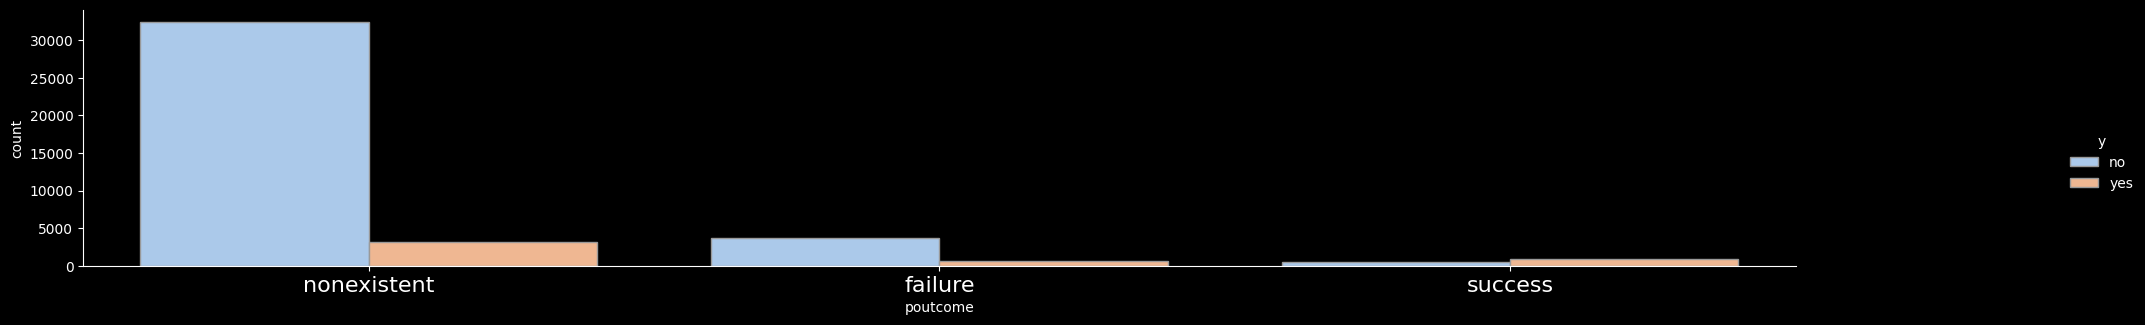

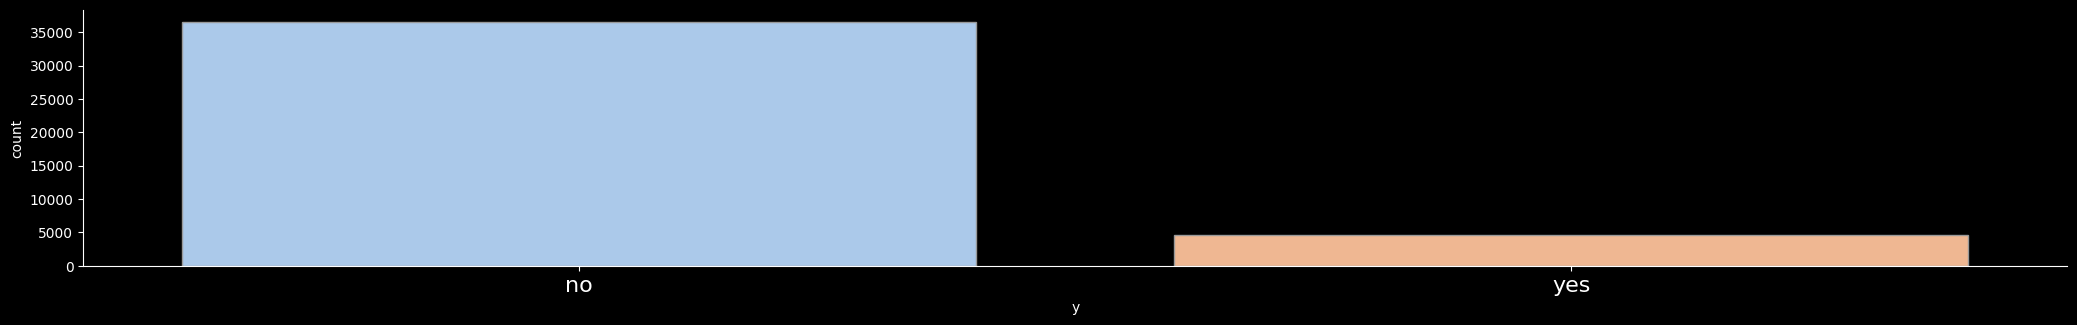

In [220]:
# catplot을 활용하여 Categorical 변수의 구성형태와 정기예금 가입 상황을 한눈에 살펴봄
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['dark_background'])

for i in categorical_list :
    sns.catplot(x=i, hue="y", kind="count",palette="pastel", edgecolor=".6",data=df);
    plt.gcf().set_size_inches(25, 3)
    plt.xticks(fontsize=16)
    plt.show()


## **🔉Process02**  
---
* 현업에서 경험적 지식에서 얻을 수 있는 노하우 기반
* "이런 사람들의 가입률이 높겠구나" 하는 노하우, 데이터로 검증 후 적용

### · 고객 프로필 - 가입률 비교
---

In [221]:
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [222]:
# 가입률이 가장 높은 직업군은 student > retired > unemployed 순

# 방식 1
import numpy as np
df['y'] = np.where(df['y']=='yes', 1, 0)
df_job = df.groupby('job')['y'].agg(['count', 'sum'])
df_job['ratio'] = round((df_job['sum'] / df_job['count'])*100, 2)
df_job.sort_values(by=['ratio'], ascending = False)

# 고객 Job(직업)에 따른 정기예금 가입 여부 수
df_job=pd.DataFrame(df['y'].groupby(df['job']).value_counts())
df_job.columns=['cnt']
df_job=df_job.reset_index()
# df_job

# 다른 표현 방식
# df['y'].groupby(df['job']).value_counts()

# pivot table을 활용하여 하나의 row로 변환
df_job = pd.pivot_table(df_job,        # 피벗할 데이터프레임
                     index = 'job',    # 행 위치에 들어갈 열
                     columns = 'y',    # 열 위치에 들어갈 열
                     values = 'cnt')   # 데이터로 사용할 열

# df_job.columns  = ['no', 'yes']
df_job = df_job.reset_index()
df_job.columns  = ['job', 'no', 'yes']

# 가입률(sign_ratio) 계산
df_job['sign_ratio'] =   round((df_job['yes'] / (df_job['yes'] + df_job['no'])) * 100,1)
df_job.sort_values(by=['sign_ratio'], ascending =False)


,job,no,yes,sign_ratio
8,student,600.0,275.0,31.4
5,retired,1286.0,434.0,25.2
10,unemployed,870.0,144.0,14.2
0,admin.,9070.0,1352.0,13.0
11,unknown,293.0,37.0,11.2
4,management,2596.0,328.0,11.2
9,technician,6013.0,730.0,10.8
6,self-employed,1272.0,149.0,10.5
3,housemaid,954.0,106.0,10.0
2,entrepreneur,1332.0,124.0,8.5


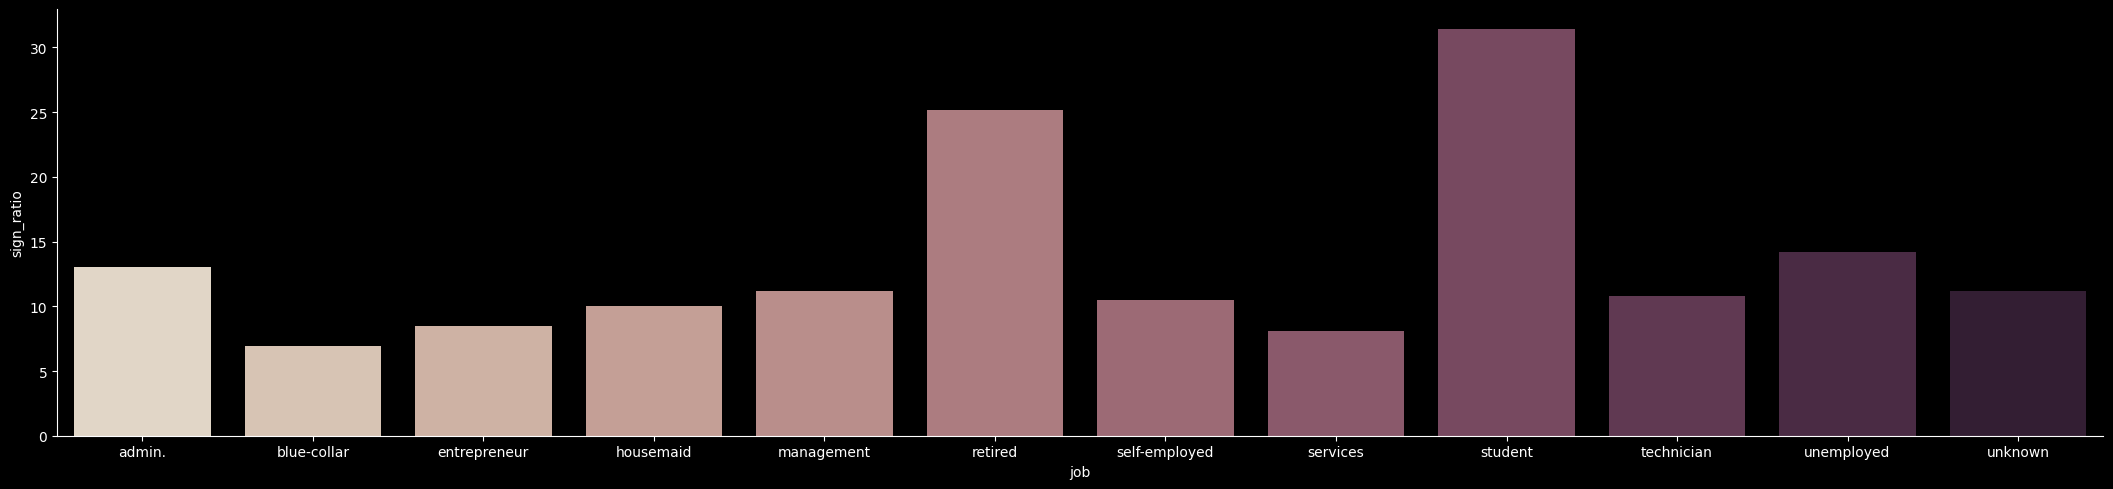

In [223]:
# 시각화
# 평균가입률 11%
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['dark_background'])

sns.catplot(x="job", y="sign_ratio", kind='bar', palette="ch:.25", data=df_job);
plt.rc('xtick', labelsize=10)
plt.gcf().set_size_inches(25, 5)

In [224]:
# 이전 마케팅 결과
i = 'poutcome'

# 1단계
df_gp=pd.DataFrame(df['y'].groupby(df[i]).value_counts())
df_gp.columns=['cnt']
df_gp=df_gp.reset_index()

# 2단계
df_gp = pd.pivot_table(df_gp,              # 피벗할 데이터프레임
                        index = i,         # 행 위치에 들어갈 열
                        columns = 'y',     # 열 위치에 들어갈 열
                        values = 'cnt')    # 데이터로 사용할 열

# 3단계
df_gp = df_gp.reset_index()

# 3-1 컬럼명 대치
df_gp.columns  = ['poutcome', 'no', 'yes']

# 4단계
df_gp['sign_ratio'] =   round((df_gp['yes'] / (df_gp['yes'] + df_gp['no'])) * 100,1)

df_gp=df_gp.sort_values(by=['sign_ratio'], ascending=False)
df_gp

,poutcome,no,yes,sign_ratio
2,success,479.0,894.0,65.1
0,failure,3647.0,605.0,14.2
1,nonexistent,32422.0,3141.0,8.8


In [225]:
categorical_list.remove('y')

In [226]:
categorical_list

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [227]:
# Categorical(범주형) 변수에 대해서 가입률 비교를 모두 진행
# Feature별 가입률이 가장 높은 Row에 대해서만 출력

for i in categorical_list :
  # 1단계
  df_job=pd.DataFrame(df['y'].groupby(df[i]).value_counts())
  df_job.columns=['cnt']
  df_job=df_job.reset_index()

  # 2단계
  df_job = pd.pivot_table(df_job,        # 피벗할 데이터프레임
                      index = i,         # 행 위치에 들어갈 열
                      columns = 'y',     # 열 위치에 들어갈 열
                      values = 'cnt')    # 데이터로 사용할 열

  # 3단계
  df_job.columns  = ['no', 'yes']
  df_job = df_job.reset_index()

  # 4단계
  df_job['sign_ratio'] =   round((df_job['yes'] / (df_job['yes'] + df_job['no'])) * 100,1)

  df_job=df_job.sort_values(by=['sign_ratio'], ascending=False)

  print(df_job.iloc[0:1,:])
  print('')

       job     no    yes  sign_ratio
8  student  600.0  275.0        31.4

   marital    no   yes  sign_ratio
3  unknown  68.0  12.0        15.0

    education    no  yes  sign_ratio
4  illiterate  14.0  4.0        22.2

  default       no     yes  sign_ratio
0      no  28391.0  4197.0        12.9

  housing       no     yes  sign_ratio
2     yes  19069.0  2507.0        11.6

  loan       no     yes  sign_ratio
0   no  30100.0  3850.0        11.3

    contact       no     yes  sign_ratio
0  cellular  22291.0  3853.0        14.7

  month     no    yes  sign_ratio
5   mar  270.0  276.0        50.5

  day_of_week      no     yes  sign_ratio
2         thu  7578.0  1045.0        12.1

  poutcome     no    yes  sign_ratio
2  success  479.0  894.0        65.1



### · Rule base 가입률
---

In [228]:
# 상위에서 평균 가입률(11%) 대비 높았던 조건을 OR조건으로 새로운 Rule(규칙)을 정의

df_rule = df[ (df['job'] == 'student') |
# (df['marital'] == 'unknown') |
# (df['education'] == 'illiterate') |
# (df['default'] == 'no') |
# (df['housing'] == 'yes') |
# (df['loan'] == 'no') |
(df['contact'] == 'cellular') |
(df['month'] == 'mar') |
(df['day_of_week'] == 'thu') |
(df['poutcome'] == 'success') ]

In [229]:
df_rule['y'].value_counts()

,count
y,
0,25143
1,4091


In [230]:
# Rule에 의한 타겟 고객군을 추출 했을 때 평균 14% 가입률을 보임
# 가입률 높았던 고객군 대상으로 캠페인 진행한다면 전체 대상 대비 평균 3%p 의 가입률 개선이 가능할 것으로 사료됩니다
4091 / (4091 + 25143)

0.1399397961277964

## **🔊Process03**  


### · 모델링을 위한 데이터 준비
---
* 모델링을 수행하기 위해 Feature와 예측하고자하는 값인 Y로 데이터를 나눔
* 학습과 예측을 위한 Train / Test set 분할

In [231]:
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [233]:
df['y'].value_counts()

,count
y,
0,36548
1,4640


In [234]:
# Train/Test data에는 문자(str)형태로 이루어진 데이터를 Input 할 수 없음
# Model에서 이해할 수 있는 1, 0으로 Target Data를 변경
import numpy as np
# df['y']=np.where(df['y']=='yes', 1, 0)
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [235]:
df['y'].value_counts()

,count
y,
0,36548
1,4640


In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [237]:
# 모델링을 학습하기 위한 Feature(X)와 Y데이터를 구분하는 단계
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

X=df.drop(['duration','y'], axis=1)
Y=df['y']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state = 42)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(28831, 19)
(28831,)
(12357, 19)
(12357,)


In [244]:
# Categorical(범주형) 변수는 One-hot-encoding or Label-encoding을 통해 숫자형 변수로 변경해야함
# One-hot-encoding은 차원이 많은 변수에는 불리, Label-encoding은 회귀관련 알고리즘에서는 사용 어려움.(※Tree 계열 알고리즘에서는 사용 가능)
# 분류문제 -> LabelEncoder

from sklearn.preprocessing import LabelEncoder

# categorical_list.remove('y')

for col in categorical_list:
    le = LabelEncoder()
    x_train[col] = le.fit_transform(x_train[col])
    x_test[col] = le.transform(x_test[col])

x_train[categorical_list].head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
7309,1,2,0,0,0,0,1,6,2,1
4169,7,1,5,1,0,0,1,6,1,1
35810,9,0,5,0,2,0,0,6,1,1
9668,0,2,6,0,2,0,1,4,1,1
34389,7,2,3,0,0,0,0,6,2,1


### · 모델 학습 및 평가
---
* 모델을 학습하고 예측을 수행하여 성능을 평가

In [245]:
## 혼동행렬, precision, recall, f1-score, 지지도 다시
# 학습
from sklearn.metrics import classification_report
rfc = RandomForestClassifier(random_state=123456)
rfc.fit(x_train, y_train)

# 예측
y_pred_train = rfc.predict(x_train)
y_pred_test = rfc.predict(x_test)

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))



              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25583
           1       0.99      0.97      0.98      3248

    accuracy                           1.00     28831
   macro avg       1.00      0.99      0.99     28831
weighted avg       1.00      1.00      1.00     28831

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     10965
           1       0.58      0.29      0.38      1392

    accuracy                           0.90     12357
   macro avg       0.75      0.63      0.66     12357
weighted avg       0.88      0.90      0.88     12357



- 학습 데이터에서는 거의 완벽하게 예측 → 과적합 가능성 있음
- 테스트 데이터에서 정기예금 가입자(1)를 잘 예측하지 못함
- recall 0.29, f1-score 0.38로 실무 활용성 낮음
- 데이터 불균형 존재 가능성:
- 가입자 수(support=1392) < 비가입자 수(support=10965)
- → 모델이 주로 0 클래스에 최적화됨

In [246]:
pd.Series(y_pred_train).value_counts()

,count
0,25658
1,3173


### · Hyper parameter 튜닝
---
* 모델 성능을 올리기 위한 옵션 조절

In [247]:
# GridSearchCV: 하이퍼파라미터 튜닝을 위한 사이킷런 도구
from sklearn.model_selection import GridSearchCV

# 실험할 하이퍼파라미터의 후보 값들 정의
# - n_estimators: 트리 개수 (고정값 400)
# - max_depth: 트리의 최대 깊이 (6, 8, 10 중에서 탐색)
params = {
    'n_estimators': [400],
    'max_depth': [6, 8, 10]
}

# 랜덤 포레스트 분류기 객체 생성
# - random_state: 결과 재현성을 위한 시드 고정
# - n_jobs = -1: 모든 CPU 코어를 활용해 병렬 연산 수행
rf_clf = RandomForestClassifier(random_state=12345, n_jobs=-1)

# GridSearchCV 설정
# - param_grid: 위에서 정의한 하이퍼파라미터 조합
# - cv=3: 3-Fold 교차검증으로 성능 측정
# - scoring='precision': 정밀도를 기준으로 최적 조합 선택
# - n_jobs=-1: 병렬 처리
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=3, n_jobs=-1, scoring='precision')

# 학습 데이터에 대해 그리드 탐색 수행 (각 하이퍼파라미터 조합에 대해 학습 및 평가)
grid_cv.fit(x_train, y_train)

# 가장 좋은 성능을 낸 하이퍼파라미터 조합 출력
print('최적 하이퍼 파라미터: ', grid_cv.best_params_)

# 교차검증에서 측정된 최고 정밀도 출력
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

# recall, f1, roc_auc 등 다른 scoring 기준으로도 변경 가능


최적 하이퍼 파라미터:  {'max_depth': 6, 'n_estimators': 400}
최고 예측 정확도: 0.6910


In [248]:
# Best score 기준 재학습
rfc = RandomForestClassifier(n_estimators=400, max_depth=6, random_state = 123456)
rfc.fit(x_train, y_train)

y_pred_train = rfc.predict(x_train)
y_pred_test = rfc.predict(x_test)

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     25583
           1       0.72      0.21      0.32      3248

    accuracy                           0.90     28831
   macro avg       0.82      0.60      0.63     28831
weighted avg       0.89      0.90      0.88     28831

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10965
           1       0.75      0.19      0.31      1392

    accuracy                           0.90     12357
   macro avg       0.83      0.59      0.63     12357
weighted avg       0.89      0.90      0.88     12357



##  훈련 데이터 결과 해석
- Class 0 (Negative)
- 정밀도 0.91, 재현율 0.99 → 거의 완벽하게 맞춤
- 주로 예측이 이 클래스에 집중되어 있음을 시사

## 테스트 데이터 결과 해석
- Class 1 (Positive)
- 정밀도 0.72 → 예측한 1 중 72%는 맞췄지만
- 재현율 0.21 → 실제 1 중 79%를 놓침
- F1-score 0.32 → Class 1 예측 성능은 낮음



In [249]:
pd.Series(y_pred_test).value_counts()

,count
0,11995
1,362


### · 중요 변수 파악
---
* Feature IMP 분석을 통한 중요변수 파악

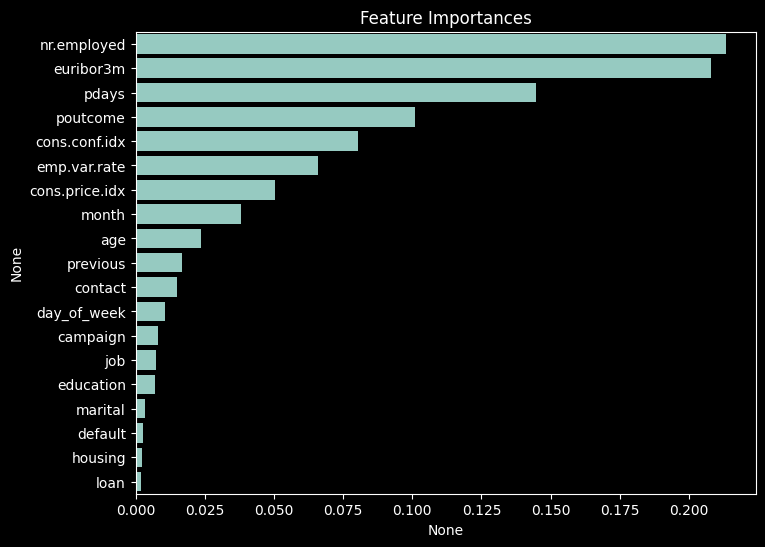

In [250]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use(['dark_background'])

ftr_importances_values = rfc.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = x_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

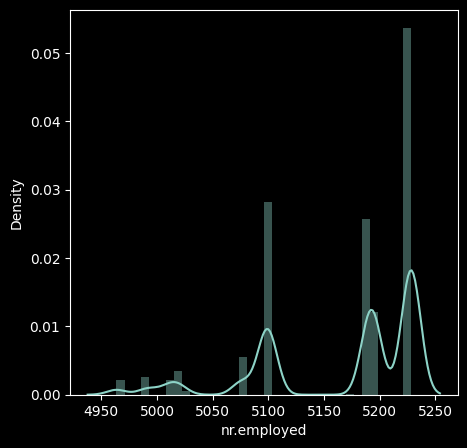

In [251]:
# 1위 변수 탐색
sns.distplot(df['nr.employed']);
plt.gcf().set_size_inches(5 ,5)

In [252]:
# 구간화
import numpy as np
df['nr.employed_gp'] = np.where (df['nr.employed'] <= 5000, '5000 이하',
                           np.where(df['nr.employed'] <= 5200, '5000~5200', '5200 초과'))

# 평가
df_gp = df.groupby('nr.employed_gp')['y'].agg(['count', 'sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
df_gp

,count,sum,ratio
nr.employed_gp,,,
5000 이하,1408,704,50.0
5000~5200,23546,3070,13.0
5200 초과,16234,866,5.3


### · 모델 Save and Read
---
* 최종 모델을 저장 및 다시 불러오기

In [253]:
import pickle
# 모델 저장
saved_model = pickle.dumps(rfc)

# 모델 Read
clf_from_pickle = pickle.loads(saved_model)